#Introduction à la visualisation des données en python

Dans ce notebook, vous trouverez des exemples de visualisation basés principalement sur la bibliothèque **Plotly**

In [77]:
#importation des librairies
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np

##Importation des données à visualiser

Dans ce tutoriel, nous utiliserons un dataset public disponibles sur internet, qui contient des données de ventes de maisons en Californie.

In [197]:
#Lecture des données (lecture d'un fichier csv)
df = pd.read_csv('sample_data/housing.csv')

In [206]:
#Première exploration du dataset (afficher un échantillon de son contenu) 
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
df.dropna(axis=0, how='all', inplace=True)

In [204]:
#Description basique qui permet de d'avoir une idée des valeurs contenues dans le dataset 
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Tests de visualisation avec matplotlib (très basique)
Cette bibliothèque est très utilisée en visualisation de données, car c'est l'une des premières, de plus de son utilisation très facile.

### Line chart

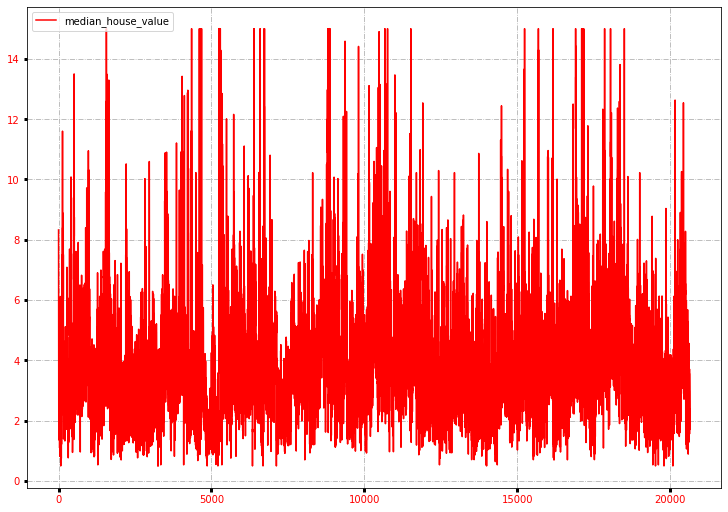

In [21]:
#Création d'une figure simple, visualisation d'u graphe de type line chart
fig, ax = plt.subplots(1, 1, figsize=(10, 7), layout='constrained')
ax.plot('median_house_value', color = 'r', data = df, label='median_house_value')
ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)
ax.legend()

### Scatter chart

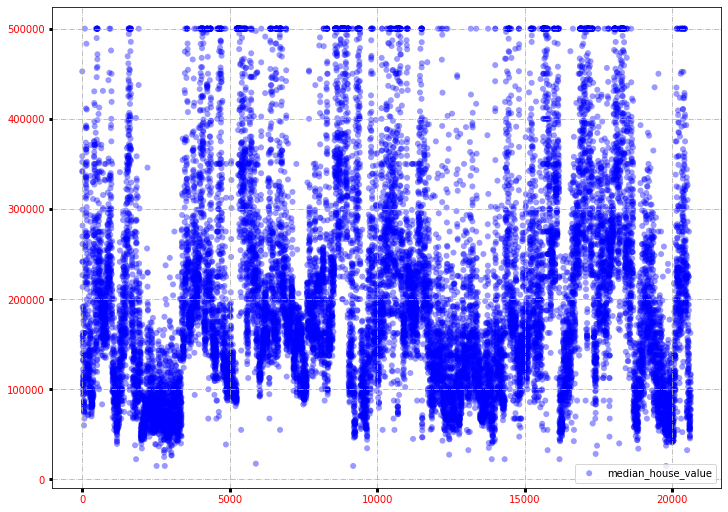

In [200]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7), layout='constrained')
ax.scatter(df.index, 'median_house_value', c='b', label='median_house_value',
               alpha=0.4, edgecolors='none', data=df)
ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)
ax.legend()

### Bar chart

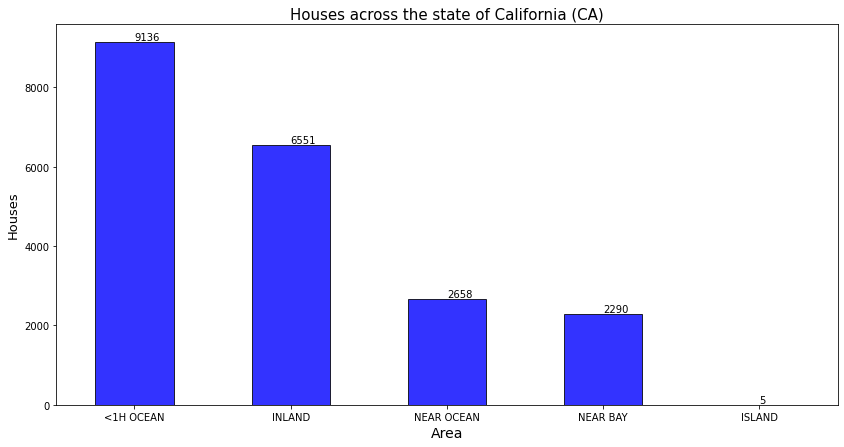

In [201]:
plt.figure(figsize=(14,7))
df['ocean_proximity'].value_counts().plot(kind='bar',edgecolor='k', color='b', alpha=0.8)
for index, value in enumerate(df['ocean_proximity'].value_counts()):
    plt.text(index, value+50, str(value))
plt.xlabel("Area", fontsize=14)
plt.ylabel("Houses", fontsize=13)
plt.xticks(rotation=0)
plt.title("Houses across the state of California (CA)", fontsize=15)
plt.show() 

### Comme remarqué, les graphes montrés ci-haut, sont très basiques et très limité en termes d'interactivité et du style. Ainsi, nous allons utiliser un autre outils (bibliothèque), qui est Plotly, elle permet de faire de la visualisation dynamique et interactive, de plus de sont style moderne.

## Visualisation de données avec Plotly

### Line chart

In [207]:
#Visualisation des prix des maisons
fig = px.line(df, y="median_house_value", hover_data=df.columns, title='median_house_value')
fig.update_xaxes(
    rangeslider_visible=True)
fig.show()

### Scatter chart

In [208]:
#Visualisation des prix des maisons, avec des points de différentes formes + différentes coleurs en fonction de leur proximité de l'océan
fig = px.scatter(df, y="median_house_value", title='median_house_value', color = 'ocean_proximity', symbol="ocean_proximity")
fig.show()

### Scatter chart + Histogram

In [68]:
#Visualition des prix des maisons en fonction de l'âge des maisons, avec un histogramme en haut
fig = px.scatter(df, x="housing_median_age", y = 'median_house_value', title='housing_median_age', #color = 'ocean_proximity', size = 'housing_median_age', 
                marginal_x="histogram", marginal_y="rug")

# fig.update_traces(marker_size=6)
fig.show()

### Scatter chart in different axes (Groupe By)

In [209]:
#Visualisation des prix de maison dans des graphes séparés en fonction de leur proximité de l'océan
fig = px.scatter(df, y="median_house_value", title='median_house_value', color = 'ocean_proximity', symbol="ocean_proximity", facet_row="ocean_proximity")
fig.show()

### Area chart

In [196]:
#Visualisation des revenus moyens en fonction des ménages présents dans les maisons
fig = px.area(df, x="households",	y = "median_income", color = "ocean_proximity",facet_col="ocean_proximity", facet_col_wrap=2)
fig.show()

In [73]:
fig = px.scatter(df, x = "total_rooms", y="total_bedrooms", title='median_house_value', color = 'ocean_proximity', 
                 symbol="ocean_proximity", trendline="ols")
fig.show()

In [169]:
fig = make_subplots(rows=1, cols=2)
fig.add_scatter(x=df.index, y=df.population, mode="lines", name='Population', row = 1, col = 1)
fig.add_scatter(x=df.index, y=df.households, mode="markers", name='Households', row = 1, col = 2)
fig.show()

### Bar chart

In [131]:
#Visualisation du nombre des maisons en fonction de leur proximité à l'océan 
fig = px.bar(x=[index for index, _ in df['ocean_proximity'].value_counts().items()], 
             y=[value for _, value in df['ocean_proximity'].value_counts().items()], labels={'x':'ocean_proximity', 'y':'value_counts'},
             text_auto=True)

fig.show()

In [138]:
#Visualisation du nombre d'habitants en fonction de la proximité
fig = px.histogram(df, x="ocean_proximity", y="population",
                barmode='group', 
             histfunc='sum', text_auto=True, #text=''
             height=400)
fig.show()

In [165]:
#Visualisation des densités de probabilités des prix moyens des maisons en fonction de la population dans la ville + La distribution
fig = px.histogram(df, x="population", y="median_house_value",
                   log_y=True, text_auto=True, histfunc='avg', 
                   marginal="violin", # can be 'rug' `box`, `violin`
                   histnorm='probability density') #'percent' or 'probability' 'density histogram' 'probability density'
fig.show()

### Pie chart

In [141]:
#Visualisation sous forme de Pie chart des populations en fonction de proximité
fig = px.pie(df, values='population', names='ocean_proximity', title='Population') 
            #  color_discrete_map={'<1H OCEAN':'lightcyan',
            #         'INLAND':'cyan',
            #        'NEAR OCEAN':'royalblue',
            #         'NEAR BAY':'darkblue',
            #         'ISLAND':'red'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Box plots

In [146]:
fig = px.box(df, x="ocean_proximity", y="households", color='ocean_proximity', notched=True, points="all")
fig.update_traces(quartilemethod="exclusive")
fig.show()

### Violin plot + box plot

In [167]:
fig = px.violin(df, y="ocean_proximity", x="households", color='ocean_proximity', box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

### Histogram + box plot

In [172]:
fig = px.histogram(df, x="housing_median_age", y="median_house_value", color='ocean_proximity', histfunc='avg',	
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

### Heat map

In [180]:
fig = px.density_heatmap(df, x="housing_median_age", y="median_house_value", text_auto=True,
                         hover_data=["ocean_proximity"])
fig.show()

In [190]:
corr = df.corr()

In [192]:
fig = px.imshow(corr, text_auto=True, aspect="auto")
fig.show()

In [185]:
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]
fig = px.imshow(data,
                labels=dict(x="Day of Week", y="Time of Day", color="Productivity"),
                x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                y=['Morning', 'Afternoon', 'Evening']
               )
fig.update_xaxes(side="top")
fig.show()

### Bar charts

In [132]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input", text_auto=True)
fig.show()

In [126]:
wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig.show()

In [127]:
df = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [128]:
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             height=400)
fig.show()